<a href="https://colab.research.google.com/github/LotfollahKarimi/Prediction-by-ARIMA/blob/main/Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train (2).csv


In [3]:
df = pd.read_csv('train.csv')
df.head()
df.tail()

,Date,Days_Operating_in a Week,Failed_Gadgets,Gadgets_in_Production
255,11/21/2022,3,68,195824
256,11/28/2022,5,107,195824
257,12/5/2022,5,109,190186
258,12/12/2022,5,95,190186
259,12/19/2022,4,72,190186


In [4]:
from datetime import datetime, date

df['Date'] = pd.to_datetime(df['Date'],)
df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

,Date,Days_Operating_in a Week,Failed_Gadgets,Gadgets_in_Production
0,2018-01-01 00:00:00,5,27,109890
1,2018-01-08 00:00:00,5,157,109890
2,2018-01-15 00:00:00,5,63,109890
3,2018-01-22 00:00:00,5,66,109890
4,2018-01-29 00:00:00,5,63,110495


In [5]:
import plotly.express as px
fig = px.line(df, x='Date', y='Failed_Gadgets', title='Failed_Gadgets')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

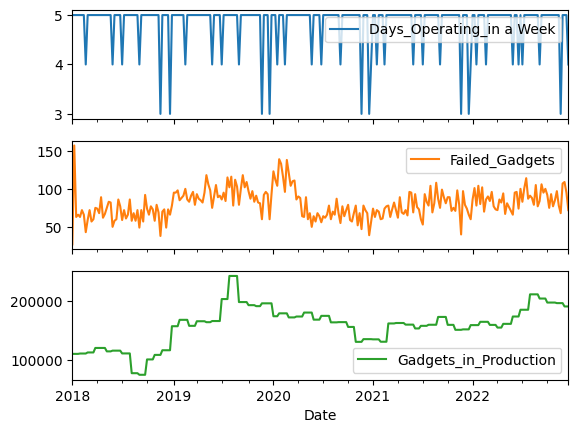

In [6]:
el_df=df.set_index('Date')
el_df.plot(subplots=True)

In [7]:
print ("\nMissing values :  ", df.isnull().any())



Missing values :   Date                        False
Days_Operating_in a Week    False
Failed_Gadgets              False
Gadgets_in_Production       False
dtype: bool


In [8]:
!pip install pmdarima


In [9]:
import pmdarima as pm


In [10]:
model = pm.auto_arima(df['Failed_Gadgets'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2290.668, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2289.399, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2220.370, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2162.420, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2287.418, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2162.779, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2164.216, Time=0.42 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2164.398, Time=0.66 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2162.358, Time=0.16 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2164.306, Time=0.52 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2166.210, Time=1.33 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2291.296, Time=0.15 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2162.141, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2162.791, Time=0.22 sec
 ARIMA(1,1,1)(2,0,0

In [18]:
train=el_df[(el_df.index.get_level_values(0) >= '2018-01-31') & (el_df.index.get_level_values(0) <= '2022-06-30')]

In [19]:
test=el_df[(el_df.index.get_level_values(0) > '2022-06-30')]


In [20]:
test.shape

(25, 3)

In [21]:
model.fit(train['Failed_Gadgets'])


ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [23]:
forecast=model.predict(n_periods=25, return_conf_int=True)
forecast

(2022-07-04    90.125886
 2022-07-11    86.404514
 2022-07-18    89.592749
 2022-07-25    89.703712
 2022-08-01    88.933368
 2022-08-08    89.090485
 2022-08-15    89.232920
 2022-08-22    89.162418
 2022-08-29    89.145930
 2022-09-05    89.166299
 2022-09-12    89.165307
 2022-09-19    89.160790
 2022-09-26    89.162094
 2022-10-03    89.162839
 2022-10-10    89.162357
 2022-10-17    89.162298
 2022-10-24    89.162424
 2022-10-31    89.162408
 2022-11-07    89.162382
 2022-11-14    89.162392
 2022-11-21    89.162396
 2022-11-28    89.162393
 2022-12-05    89.162393
 2022-12-12    89.162394
 2022-12-19    89.162393
 Freq: W-MON, dtype: float64,
 array([[ 62.91264337, 117.33912816],
        [ 58.2366469 , 114.5723804 ],
        [ 60.8621623 , 118.3233363 ],
        [ 59.04703339, 120.36039008],
        [ 56.72553272, 121.14120249],
        [ 55.67708958, 122.50388019],
        [ 54.54439477, 123.92144577],
        [ 53.2105858 , 125.11425057],
        [ 52.00637953, 126.28547989],
   

In [24]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])
forecast_df

,Prediction
Date,
2022-07-04,90.125886
2022-07-11,86.404514
2022-07-18,89.592749
2022-07-25,89.703712
2022-08-01,88.933368
2022-08-08,89.090485
2022-08-15,89.232920
2022-08-22,89.162418
2022-08-29,89.145930


<Axes: xlabel='Date'>

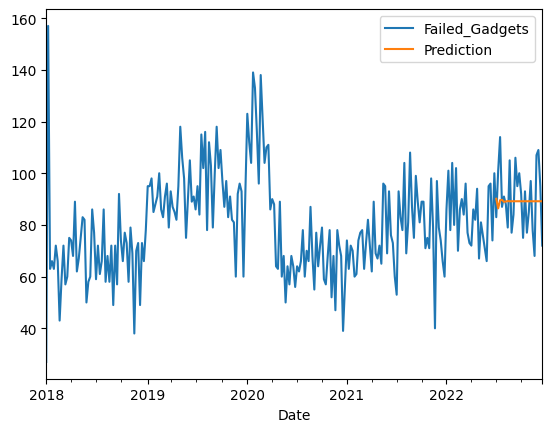

In [25]:
import matplotlib.pyplot as plt
pd.concat([el_df['Failed_Gadgets'],forecast_df],axis=1).plot()
